# DATA Analysis - Binder version

Explain


#### Further implementation:

- Data to be put in ordo (or Zenodo)

#### Libraries

- **gdown**: Download a large file from Google Drive
- **zenodo_dl**: downloading large Zenodo records which contain many files

In [1]:
import numpy 
import math
import matplotlib
import matplotlib.pyplot as plt
import ipympl 
from matplotlib import cm
import matplotlib.colors as mcolors
import pandas as pd
from glob import glob
from functools import reduce
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, Layout, HBox
import re
from itertools import cycle
import zipfile 
import zenodo_dl as zdl
#import wx
#import gdown 

In [2]:
%matplotlib widget

In [3]:
spl = 'ASW'

# Data import

5 csv that include all the reduced data so far (31-03-2022) are imported as df :

- XP_list_test (XP_Ramp_df)
- Data_Annex_full (Data_Annex_full_df)
- DR1_full (DR1_full_df)
- DR2_full (DR2_full_df)
- DR3_full (DR3_full_df)

### Download  

DR2 and DR1 are big files, hence they are stored on google drive and needs to be uploaded within the notebook.

- Use Zenodo link to download the data !!!

In [11]:
# DR1

DR1_full_df = pd.read_csv("..\..\Data\DATA_Full\DR1_Full.csv")
del DR1_full_df['Unnamed: 0']
                       
# DR2
                       
DR2_full_df = pd.read_csv("..\..\Data\DATA_Full\DR2_Full_int1.csv")  
del DR2_full_df['Unnamed: 0']

# Sample_T_Ref

XP_Ramp_df = pd.read_csv("..\..\Data\DATA_Full\Sample_T-Ramp_Final.csv") 

In [13]:
DR2_full_df

,Wavenumber,ASW_2020_09_15_1,ASW_2020_09_15_2,ASW_2020_09_15_3,ASW_2020_09_15_4,ASW_2020_09_16_1,ASW_2020_09_16_2,ASW_2020_09_16_3,ASW_2020_09_16_4,ASW_2020_09_16_5,...,ASW_2021_07_13_17,ASW_2021_07_13_18,ASW_2021_07_13_19,ASW_2021_07_13_20,ASW_2021_07_13_21,ASW_2021_07_13_22,ASW_2021_07_13_23,ASW_2021_07_13_24,ASW_2021_07_13_25,ASW_2021_07_13_26
0,799.84,0.060549,0.076188,0.071446,0.047759,0.061813,0.062677,0.070377,0.071031,0.073033,...,0.093934,0.093203,0.092399,0.099772,0.096810,0.097544,0.100107,0.103579,0.104936,0.101043
1,800.33,0.059965,0.074772,0.075044,0.037780,0.059208,0.059777,0.064277,0.064086,0.066281,...,0.083360,0.081969,0.082094,0.088924,0.087240,0.086223,0.089819,0.093463,0.093718,0.099738
2,800.81,0.059358,0.071323,0.077309,0.027005,0.056651,0.057048,0.058439,0.057722,0.059902,...,0.072232,0.071203,0.071244,0.077594,0.076774,0.074845,0.079243,0.082596,0.082294,0.098120
3,801.29,0.059458,0.067423,0.074469,0.028824,0.056841,0.057890,0.060087,0.059701,0.061729,...,0.070915,0.071538,0.070631,0.075896,0.075466,0.074291,0.078632,0.081942,0.081429,0.096272
4,801.77,0.059095,0.065795,0.072036,0.031592,0.057564,0.059094,0.061732,0.062012,0.063394,...,0.075783,0.076050,0.075375,0.080245,0.080174,0.079724,0.083327,0.086687,0.086468,0.096067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6634,3998.26,0.000151,0.000688,0.000876,0.000556,0.000884,0.000916,0.000533,0.000411,0.000489,...,0.001156,0.001089,0.001162,0.001180,0.001225,0.001234,0.001153,0.001119,0.001150,0.001113
6635,3998.74,0.000183,0.000399,0.000554,0.000626,0.000476,0.000507,0.000442,0.000392,0.000458,...,0.001186,0.001108,0.001187,0.001181,0.001220,0.001265,0.001183,0.001146,0.001162,0.001189
6636,3999.22,0.000101,0.000000,0.000000,0.000436,0.000000,0.000000,0.000000,0.000039,0.000088,...,0.001247,0.001184,0.001280,0.001206,0.001251,0.001322,0.001264,0.001229,0.001242,0.001314
6637,3999.70,0.000105,0.000750,0.000746,0.000190,0.000703,0.000696,0.000560,0.000518,0.000532,...,0.000616,0.000588,0.000641,0.000596,0.000628,0.000660,0.000640,0.000611,0.000625,0.000614


## Data frame cleaning

In [14]:
XP_Ramp_df_I = XP_Ramp_df.set_index('Date')

### Data-frame construction

In [15]:
# XP-Ramp

#XP_Ramp_df = pd.read_csv('XP_list_test.csv')
#XP_Ramp_df_I = XP_Ramp_df.set_index('Date')

#Data_Annex

#Data_Annex_full_df1 = pd.read_csv('Data_Annex_full.csv')
#Data_Annex_full_df = Data_Annex_full_df1.set_index('Name')
#del Data_Annex_full_df['Unnamed: 0']

#DR1

#DR1_full_df = pd.read_csv('DR1_full.csv')

#DR2

#DR2_full_df = pd.read_csv('DR2_full.csv')

#DR3

#DR3_full_df = pd.read_csv('DR3_full.csv')

### Sanity Check

In [16]:
#Data_Annex_full_df

# Scan selection

## Parameter list

In [18]:
Temp = XP_Ramp_df_I.columns[1:].values.tolist()
Date = XP_Ramp_df_I.index.values.tolist()
Sample = XP_Ramp_df_I['Sample'].values.tolist()
Reduc = ['DR2','DR3']
#Scans = ['Single','Multi']
#Param = list(Data_Annex_full_df.columns.values)

## Widget selection

Some stuffs

In [19]:
#Create Dropdown Box Widget

#wR = widgets.SelectMultiple(
#    options= Reduc,
#    description='Reduction',
#    disabled=False,
#)

wT = widgets.SelectMultiple(
    options= Temp,
    description='Temperature:',
    disabled=False,
)

wD = widgets.SelectMultiple(
    options= Date,
    description='Date',
    disabled=False,
)

#wS = widgets.SelectMultiple(
#    options= Sample,
#    description='Sample',
#    disabled=False,
#)

wSc = widgets.Checkbox(
    value=False,
    description='Iso',
    disabled=False,
    indent=False
)


#widgets.HBox([wD,wT])

h1 = widgets.HBox(children=[wD,wT,wSc])


#display(wT,wD)
display(h1)

### Confirm 

Click on the cell below to confirm the selected scans

In [40]:
wT_L = list(wT.value)
wD_L = list(wD.value)
wSc_B = bool(wSc.value)

In [41]:
wSc_B

False

## Sample name construction

Can I create an intermediate step to select only one number from the many per temperature when I don`t want to plot the isotherms
- create input button (boolean that allow to choose between 1 scan or isotherm)

In [42]:
#date = ['2020_09_16','2020_09_17']
#temp = ['60K','80K']
#spl = 'ASW'

z = []
value_1 = []
value_2 = []

for x in wD_L:
    for y in wT_L:

        value = str(XP_Ramp_df_I.loc[XP_Ramp_df_I.index == x, y].values[0])
        print(value)
        print(type(value))
        value_1 = re.findall(r"[-+]?\d*\.\d+|\d+", value)
        print(value_1)
        
        #Isotherm (all values but first one - Warm-up scan)
        #value_2 = value_1[1:]   #here we selct all but first value (warm-up)
        
        #Multiple scans (T range) - (Only the last value)
        #value_2 = value_1[-1:]  #here we selct only the last value of the list
        
        print(value_1)
        for items in value_1:
        
            to_plot = str('{}_{}_{}'.format(spl, x, items))
            z.append({
                
               'Name' : str(to_plot),
               'Temp' : y,
               'Date' : x, 
                
          
         
         })

dat= pd.DataFrame(z)
data_df = dat.set_index('Name')
            

[1]
<class 'str'>
['1']
['1']
[1, 2]
<class 'str'>
['1', '2']
['1', '2']
[1, 2]
<class 'str'>
['1', '2']
['1', '2']


## Plot pre-formating

### Temperature

In [43]:
def Temp_color(row):
    if row['Temp'] == '20':
        return int(1)
    elif row['Temp'] == '30':
        return int(2) 
    elif row['Temp'] == '40':
        return int(3)
    elif row['Temp'] == '50':
        return int(4)
    elif row['Temp'] == '60':
        return int(5)
    elif row['Temp'] == '70':
        return int(6)
    elif row['Temp'] == '80':
        return int(7)
    elif row['Temp'] == '90':
        return int(8)
    elif row['Temp'] == '100':
        return int(9)
    elif row['Temp'] == '110':
        return int(10)
    elif row['Temp'] == '120':
        return int(11)
    elif row['Temp'] == '125':
        return int(12)
    elif row['Temp'] == '130':
        return int(13)
    elif row['Temp'] == '132':
        return int(14)
    elif row['Temp'] == '134':
        return int(15)
    elif row['Temp'] == '135':
        return int(16)
    elif row['Temp'] == '136':
        return int(17)
    elif row['Temp'] == '137':
        return int(18)
    elif row['Temp'] == '138':
        return int(19)
    elif row['Temp'] == '140':
        return int(20)
    elif row['Temp'] == '145':
        return int(21)
    elif row['Temp'] == '150':
        return int(21)
    elif row['Temp'] == '155':
        return int(22)
    elif row['Temp'] == '160':
        return int(23)
    elif row['Temp'] == '180':
        return int(24)
    elif row['Temp'] == '200':
        return int(25)

In [44]:
data_df['Colour'] = data_df.apply (lambda row: Temp_color(row), axis=1)

### Linestyle (date)

In [45]:
linestyle = ['-',':','--','-.']

In [46]:
LD = dict(zip(wD_L, linestyle))

data_df['linestyle'] = data_df['Date'].map(LD)

In [47]:
LD

{'2020_09_15': '-', '2020_09_16': ':', '2020_09_28': '--'}

### Sanity Check

In [48]:
data_df

,Temp,Date,Colour,linestyle
Name,,,,
ASW_2020_09_15_1,20,2020_09_15,1,-
ASW_2020_09_16_1,20,2020_09_16,1,:
ASW_2020_09_16_2,20,2020_09_16,1,:
ASW_2020_09_28_1,20,2020_09_28,1,--
ASW_2020_09_28_2,20,2020_09_28,1,--


# Plotting

## Scans

### DR2

5


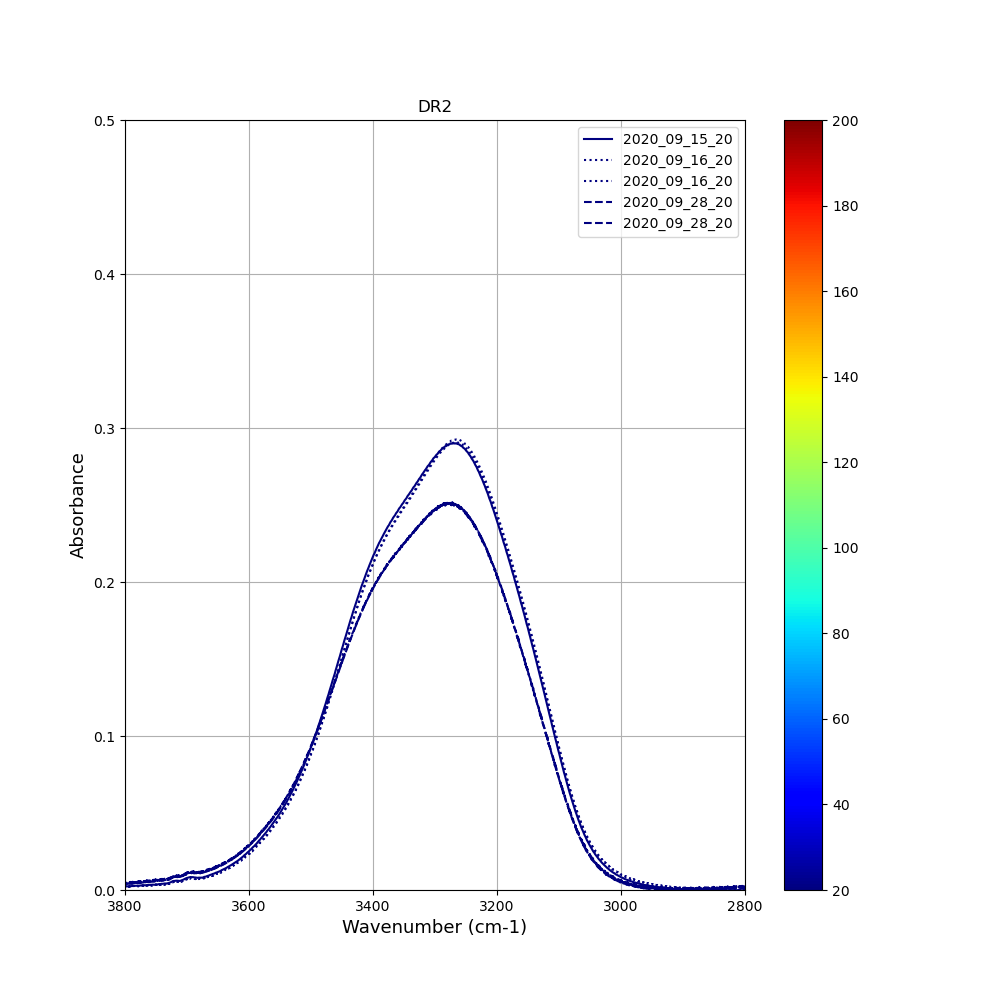

In [49]:
nscan = len(list(data_df['Date'].values.tolist()))

print(nscan)

fig, ax= plt.subplots(figsize=(10,10))

normalize = mcolors.Normalize(vmin=20, vmax=200)
colormap = cm.jet

for i in dat['Name']:
    

    x = DR2_full_df.Wavenumber
    y = DR2_full_df['{}'.format(i)]
    
    plt.plot(x,y, label="{}_{}".format(str(data_df.loc[i]['Date']), str(data_df.loc[i]['Temp'])), color=colormap(normalize(int(data_df.loc[i]['Temp']))), linestyle=(data_df.loc[i]['linestyle'])) 


plt.title('DR2')
plt.axis([3800,2800,0,0.50])
plt.xlabel('Wavenumber (cm-1)').set_fontsize(13)
plt.ylabel('Absorbance').set_fontsize(13)
#ax = fig.gca()
plt.grid()
plt.legend()

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(nscan)
plt.colorbar(scalarmappaple)


#plt.savefig('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{0}\Plots\DR1\DR1_{0}_All_scans.png'.format(date))

plt.show()

### DR1

Why:
- Compare the DR2 and DR1 to see if the difference observed arise from the reduction process.

In [ ]:
nscan = len(list(data_df['Date'].values.tolist()))

print(nscan)

fig, ax= plt.subplots(figsize=(10,10))

normalize = mcolors.Normalize(vmin=20, vmax=200)
colormap = cm.jet

for i in dat['Name']:
    

    x = DR1_full_df.Wavenumber
    y = DR1_full_df['{}'.format(i)]
    
    plt.plot(x,y, label="{}_{}".format(str(data_df.loc[i]['Date']), str(data_df.loc[i]['Temp'])), color=colormap(normalize(int(data_df.loc[i]['Temp']))), linestyle=(data_df.loc[i]['linestyle'])) 


plt.title('DR1')
plt.axis([3800,2800,-0.2,0.6])
plt.xlabel('Wavenumber (cm-1)').set_fontsize(13)
plt.ylabel('Absorbance').set_fontsize(13)
#ax = fig.gca()
plt.grid()
plt.legend()

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(nscan)
plt.colorbar(scalarmappaple)


#plt.savefig('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{0}\Plots\DR1\DR1_{0}_All_scans.png'.format(date))

plt.show()

### DR3

Not available for now

In [ ]:
nscan = len(list(data_df['Date'].values.tolist()))

print(nscan)

fig, ax= plt.subplots(figsize=(12,10))

normalize = mcolors.Normalize(vmin=20, vmax=200)
colormap = cm.jet

for i in dat['Name']:
    
#`DR3

    x = DR3_full_df.Wavenumber
    y = DR3_full_df['{}'.format(i)]
    
    plt.plot(x,y, label="{}_{}".format(str(data_df.loc[i]['Date']), str(data_df.loc[i]['Temp'])), color=colormap(normalize(int(data_df.loc[i]['Temp']))), linestyle=(data_df.loc[i]['linestyle'])) 


plt.title('DR3 ')
plt.axis([3800,2800,0,0.45])
plt.xlabel('Wavenumber (cm-1)').set_fontsize(13)
plt.ylabel('Absorbance').set_fontsize(13)
#ax = fig.gca()
plt.grid()
plt.legend()

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(nscan)
plt.colorbar(scalarmappaple)


#plt.savefig('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{0}\Plots\DR1\DR1_{0}_All_scans.png'.format(date))

plt.show()

## Data Annex

## Plotting

Use interact to play with the data I plot

In [ ]:
wP = widgets.SelectMultiple(
    options= Param,
    description='Parameters',
    disabled=False,
)

display(wP)


In [ ]:
wP_L = list(wP.value)

In [ ]:
# Widget selection



#interact(wP = widgets.SelectMultiple(
#    options= Param,
#    description='Parameters',
#    disabled=False,
#));




# Figure

fig, ax= plt.subplots(figsize=(10,10))

normalize = mcolors.Normalize(vmin=20, vmax=200)
colormap = cm.jet

for i in dat['Name']:
    for j in wP_L:

    #print(i)
    #print(j)
        
        x = Data_Annex_full_df[('{}'.format(j))].loc[('{}'.format(i))]
        #y = Data_Annex_full_df['{}'.format(j)]
        #y = Data_Annex_full_df['{}'.format(j)].loc[Data_Annex_full_df.index == ('{}'.format(i))]
        #y = Data_Annex_full_df.loc[(Data_Annex_full_df['{}'.format(j)])] & [(Data_Annex_full_df['column_name'] == x)]
        #print(x,y)
        #print(i)    
        #print(x)
    
        

        plt.plot(i,x, '+', mew=2, ms=8, color=colormap(normalize(int(data_df.loc[i]['Temp']))) )

plt.title('Data Annex')
#plt.axis([3800,2800,0,0.45])
# Set number of ticks for x-axis

# Set ticks labels for x-axis

#plt.xlabel('Wavenumber (cm-1)').set_fontsize(13)

#plt.ylabel('Absorbance').set_fontsize(13)
plt.xticks(rotation=90)
#plt.tight_layout()
ax = fig.gca()
#plt.grid()
#plt.legend()

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(nscan)
plt.colorbar(scalarmappaple)


#plt.savefig('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{0}\Plots\DR1\DR1_{0}_All_scans.png'.format(date))

plt.show()

## More

 - fit linear model to desorption great